In [133]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import preprocessing
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

from itertools import chain

In [134]:
#Load cleaned csv file
df = pd.read_csv("V2 - amenities.csv")
df = df.dropna(how='all')

In [135]:
#Calculate log2(Rev) and logs(Daily Rate) for location analysis later on
df['log2_Rev'] = np.log2(df['Revenue'])
df['log2_Daily_Rate'] = np.log2(df['Daily Rate'])

In [4]:
df.head()

,id,listing_url,name,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,No of Features,log2_Rev,log2_Daily_Rate
0,10466090.0,https://www.airbnb.com/rooms/10466090,THE GOLF HOUSE,-34.11066,18.83816,House,Entire home/apt,6.0,2.5,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,14.342283,7.312883
1,36163728.0,https://www.airbnb.com/rooms/36163728,"Airy, stylish apartment with balcony in Strand",-34.11005,18.83889,Apartment,Entire home/apt,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.0,8.873444,5.087463
2,13403511.0,https://www.airbnb.com/rooms/13403511,"The Lodge, charming guesthouse/house @ Strand.",-34.11168,18.83698,Villa,Private room,16.0,9.5,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,11.819780,5.643856
3,36861701.0,https://www.airbnb.com/rooms/36861701,Trust Lodging No. 2,-34.11163,18.83408,Guest suite,Entire home/apt,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,7.629357,5.321928
4,24531114.0,https://www.airbnb.com/rooms/24531114,Anne of Windy Willows,-34.11145,18.83216,House,Private room,2.0,1.5,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,35.0,14.005361,5.857981


In [136]:
#Get region boundaries
BBox = (df.longitude.min(), df.longitude.max(), df.latitude.min(), df.latitude.max())
print(BBox)

(18.81416, 18.88079, -34.14111, -34.09455)


In [137]:
#Load map
str_m = plt.imread('map.png')

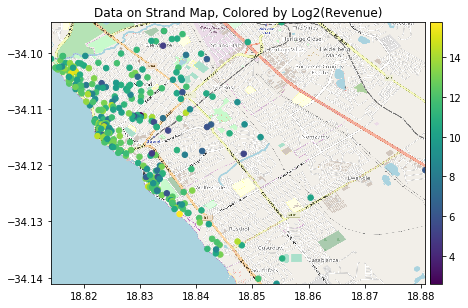

In [113]:
#Plot Log2(Rev) on Strand map, low correlation with location. Use log2 to reduce the wide range of revenue.
fig, ax = plt.subplots(figsize = (7,8))
scatter = ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, s=30, c=df['log2_Rev'], cmap=plt.cm.viridis)
ax.set_title('Data on Strand Map, Colored by Log2(Revenue)')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(str_m, zorder=0, extent = BBox, aspect= 'equal')

#Add colorbar (tried monotone, but it looked even worse)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.07)
fig.colorbar(scatter, cax=cax, orientation='vertical')

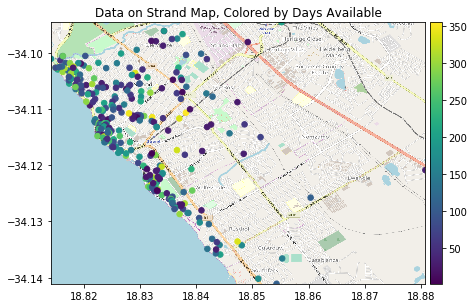

In [107]:
#Plot Days Available on the map, low correlation with location
fig, ax = plt.subplots(figsize = (7,8))
scatter = ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, s=30, c=df['Days Available'], cmap=plt.cm.viridis)
ax.set_title('Data on Strand Map, Colored by Days Available')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(str_m, zorder=0, extent = BBox, aspect= 'equal')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.07)
fig.colorbar(scatter, cax=cax, orientation='vertical')

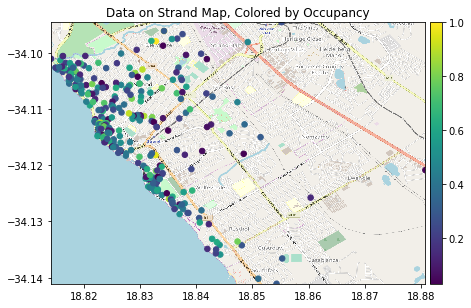

In [109]:
#Plot Occupancy Rate on the map, low correlation with location
fig, ax = plt.subplots(figsize = (7,8))
scatter = ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, s=30, c=df['Occupancy'], cmap=plt.cm.viridis)
ax.set_title('Data on Strand Map, Colored by Occupancy')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(str_m, zorder=0, extent = BBox, aspect= 'equal')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.07)
fig.colorbar(scatter, cax=cax, orientation='vertical')

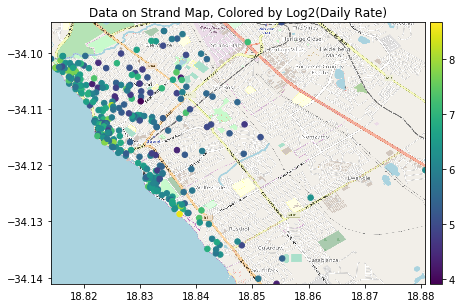

In [118]:
#Plot Log2(Daily Rate) on the map, low correlation with location
fig, ax = plt.subplots(figsize = (7,8))
scatter = ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, s=30, c=df['log2_Daily_Rate'], cmap=plt.cm.viridis)
ax.set_title('Data on Strand Map, Colored by Log2(Daily Rate)')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(str_m, zorder=0, extent = BBox, aspect= 'equal')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.07)
fig.colorbar(scatter, cax=cax, orientation='vertical')

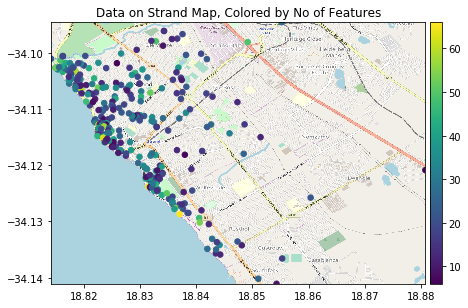

In [119]:
#Plot # of features on the map, low correlation with location
fig, ax = plt.subplots(figsize = (7,8))
scatter = ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, s=30, c=df['No of Features'], cmap=plt.cm.viridis)
ax.set_title('Data on Strand Map, Colored by No of Features')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(str_m, zorder=0, extent = BBox, aspect= 'equal')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.07)
fig.colorbar(scatter, cax=cax, orientation='vertical')

Text(0.5, 0, 'n_components')

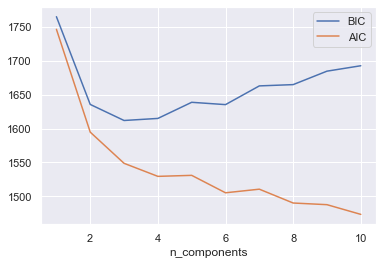

In [188]:
#Daily Rate & Days Available are two controlable inputs from the business owners
#We need a classifier to separate different positionings on the 2D graph of Daily Rate vs. Days Available
#We do not know how to make the clusters, so we use unsupervised classification
#We pick Gaussian Miture Model (GMM) becasue it returns soft boundaries

sns.set()

n_components = np.arange(1, 11)
X = df[["Daily Rate","Days Available"]]

#We standardize the data be for running GMM
X_std = X
X_scaled_values = preprocessing.scale(X)
X_std = pd.DataFrame(X_scaled_values, columns=X_std.columns)

models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_std) for n in n_components]

#We use elbow method to find the best number of clusters/components; in this case it's 3
plt.plot(n_components, [m.bic(X_std) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_std) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

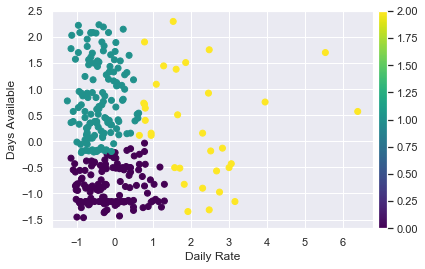

In [139]:
#Run GMM with n=3 and plot the data points on the graph (standardized scale)
#The result makes sense to us. 
#We have cluster 1. low price, low availability; 2. Low price, high availability; 3. high price
gmm = GaussianMixture(n_components=3)
gmm.fit(X_std)

labels = gmm.predict(X_std)

fig, ax = plt.subplots()
scatter = ax.scatter(X_std["Daily Rate"], X_std["Days Available"], c=labels, cmap='viridis')
plt.xlabel("Daily Rate")
plt.ylabel("Days Available")

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.07)
fig.colorbar(scatter, cax=cax, orientation='vertical')

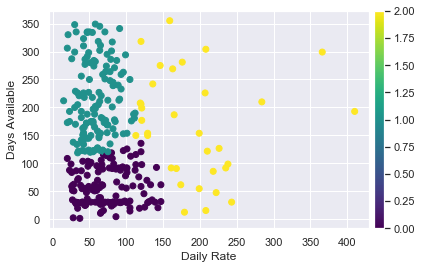

In [140]:
#Replot the classified data with original scale
df["GMM_Label"] = labels

fig, ax = plt.subplots()
scatter = ax.scatter(df["Daily Rate"], df["Days Available"], c=df["GMM_Label"], cmap='viridis')
plt.xlabel("Daily Rate")
plt.ylabel("Days Available")

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.07)
fig.colorbar(scatter, cax=cax, orientation='vertical')

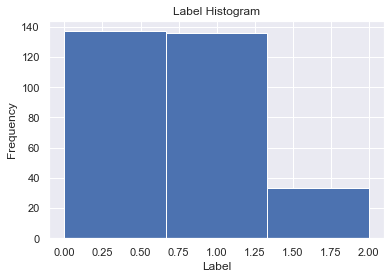

In [187]:
#Quick check for the data points in each cluster
plt.hist(df["GMM_Label"],bins=3)

plt.title("Label Histogram")
plt.xlabel("Label")
plt.ylabel("Frequency")

plt.show()

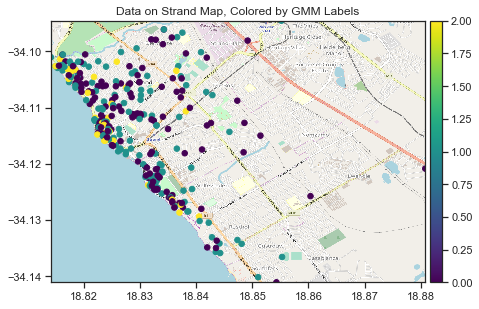

In [141]:
#Plot classified data on the map, low correlation with location
sns.set_style("ticks")

fig, ax = plt.subplots(figsize = (7,8))
scatter = ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, s=30, c=df['GMM_Label'], cmap=plt.cm.viridis)
ax.set_title('Data on Strand Map, Colored by GMM Labels')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(str_m, zorder=0, extent = BBox, aspect= 'equal')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.07)
fig.colorbar(scatter, cax=cax, orientation='vertical')

Text(0.5, 0, 'k_clusters')

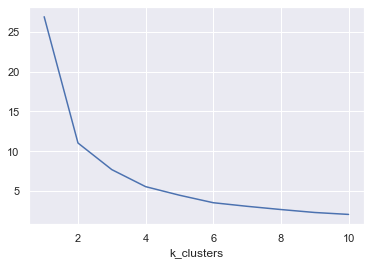

In [126]:
#We did try K-means
#Elbow method tells us to use 3 clusters
sns.set()

X = df[["Daily Rate","Days Available"]]

X_nor = X
min_max_scaler = preprocessing.MinMaxScaler()
X_nor_values = min_max_scaler.fit_transform(X)
X_nor = pd.DataFrame(X_nor_values, columns=X_nor.columns)

Sum_of_squared_distances = []
k_clusters = np.arange(1, 11)
for k in k_clusters:
    km_models = KMeans(k).fit(X_nor)
    Sum_of_squared_distances.append(km_models.inertia_)

plt.plot(k_clusters, Sum_of_squared_distances)
plt.xlabel('k_clusters')

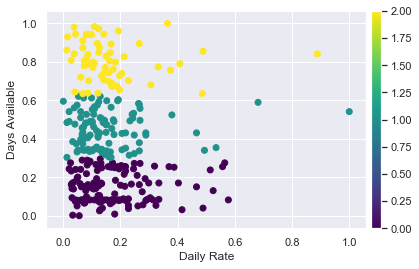

In [145]:
#We discard K-means because we cannot make sense of the result, which is against our business intuition
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_nor)

kmeans_labels = kmeans.predict(X_nor)
centroids = kmeans.cluster_centers_

fig, ax = plt.subplots()
scatter = ax.scatter(X_nor["Daily Rate"], X_nor["Days Available"], c=kmeans_labels, cmap='viridis')
plt.xlabel("Daily Rate")
plt.ylabel("Days Available")

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.07)
fig.colorbar(scatter, cax=cax, orientation='vertical')

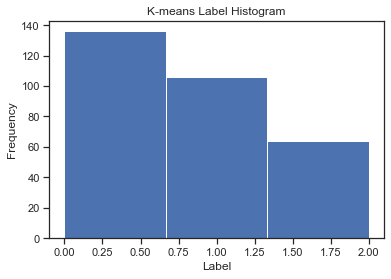

In [152]:
#Quick check on the # of data points for each K-means cluster
plt.hist(kmeans_labels,bins=3)

plt.title("K-means Label Histogram")
plt.xlabel("Label")
plt.ylabel("Frequency")

plt.show()

In [14]:
df.head(10)

,id,listing_url,name,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,No of Features,log2_Rev,log2_Daily_Rate,GMM_Label
0,10466090.0,https://www.airbnb.com/rooms/10466090,THE GOLF HOUSE,-34.11066,18.83816,House,Entire home/apt,6.0,2.5,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,35.0,14.342283,7.312883,0
1,36163728.0,https://www.airbnb.com/rooms/36163728,"Airy, stylish apartment with balcony in Strand",-34.11005,18.83889,Apartment,Entire home/apt,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,18.0,8.873444,5.087463,2
2,13403511.0,https://www.airbnb.com/rooms/13403511,"The Lodge, charming guesthouse/house @ Strand.",-34.11168,18.83698,Villa,Private room,16.0,9.5,9.0,...,0.0,0.0,0.0,0.0,1.0,0.0,26.0,11.819780,5.643856,1
3,36861701.0,https://www.airbnb.com/rooms/36861701,Trust Lodging No. 2,-34.11163,18.83408,Guest suite,Entire home/apt,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,27.0,7.629357,5.321928,2
4,24531114.0,https://www.airbnb.com/rooms/24531114,Anne of Windy Willows,-34.11145,18.83216,House,Private room,2.0,1.5,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,35.0,14.005361,5.857981,1
5,21352683.0,https://www.airbnb.com/rooms/21352683,Mills Cottage,-34.11213,18.83206,Cottage,Entire home/apt,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,32.0,11.236014,6.321928,2
6,21016825.0,https://www.airbnb.com/rooms/21016825,5 Private bedrooms all on-suite in guest house,-34.11234,18.83247,Guesthouse,Private room,2.0,5.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,31.0,5.700440,5.700440,2
7,24531108.0,https://www.airbnb.com/rooms/24531108,Anne of Green Gables with en-suite,-34.11124,18.83073,Bed and breakfast,Hotel room,2.0,1.5,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,22.0,13.812278,5.857981,1
8,16063732.0,https://www.airbnb.com/rooms/16063732,Sea Spray Cottage,-34.11113,18.83009,Apartment,Entire home/apt,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,36.0,2.584963,6.108524,2
9,15991870.0,https://www.airbnb.com/rooms/15991870,De'Vine Loft is a cozy and romantic space,-34.11143,18.83012,Loft,Entire home/apt,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,18.0,9.527477,6.066089,2


In [142]:
#Create dummy variables for accommodates, bathrooms, bedrooms, and beds
#We plot the frequency of each of those 4 variables first. The distribution is like 1/x
#We put the higher number of each variables into one group; for example, we put accommodates>6 in one bucket
temp_for_dummies = []
temp_for_dummies = df[["accommodates","bathrooms","bedrooms","beds"]]
temp_for_dummies = pd.get_dummies(temp_for_dummies, columns=["accommodates","bathrooms","bedrooms","beds"], drop_first=True)

temp_for_dummies["accommodates>6"] = temp_for_dummies[["accommodates_7.0","accommodates_8.0","accommodates_10.0",
                                                       "accommodates_12.0","accommodates_13.0","accommodates_16.0"]].agg("max", axis="columns")
temp_for_dummies.drop(columns=["accommodates_7.0","accommodates_8.0","accommodates_10.0",
                               "accommodates_12.0","accommodates_13.0","accommodates_16.0"],inplace=True)

temp_for_dummies["bathrooms>2"] = temp_for_dummies[["bathrooms_2.5","bathrooms_3.0","bathrooms_3.5",
                                                    "bathrooms_4.0","bathrooms_4.5","bathrooms_5.0","bathrooms_9.5"]].agg("max", axis="columns")
temp_for_dummies.drop(columns=["bathrooms_2.5","bathrooms_3.0","bathrooms_3.5","bathrooms_4.0",
                               "bathrooms_4.5","bathrooms_5.0","bathrooms_9.5"],inplace=True)

temp_for_dummies["bedrooms>3"] = temp_for_dummies[["bedrooms_4.0","bedrooms_5.0",
                                                   "bedrooms_9.0"]].agg("max", axis="columns")
temp_for_dummies.drop(columns=["bedrooms_4.0","bedrooms_5.0","bedrooms_9.0"],inplace=True)

temp_for_dummies["beds>4"] = temp_for_dummies[["beds_5.0","beds_6.0","beds_7.0",
                                               "beds_8.0","beds_16.0"]].agg("max", axis="columns")
temp_for_dummies.drop(columns=["beds_5.0","beds_6.0","beds_7.0","beds_8.0","beds_16.0"],inplace=True)

temp_for_dummies = temp_for_dummies[["accommodates_2.0","accommodates_3.0","accommodates_4.0","accommodates_5.0",
                                    "accommodates_6.0","accommodates>6","bathrooms_1.0","bathrooms_1.5",
                                    "bathrooms_2.0","bathrooms>2","bedrooms_1.0","bedrooms_2.0","bedrooms_3.0","bedrooms>3",
                                    "beds_1.0","beds_2.0","beds_3.0","beds_4.0","beds>4"]]

temp_for_dummies.rename(columns={"accommodates_2.0":"accommodates_2","accommodates_3.0":"accommodates_3",
                                 "accommodates_4.0":"accommodates_4","accommodates_5.0":"accommodates_5",
                                 "accommodates_6.0":"accommodates_6","bedrooms_1.0":"bedrooms_1",
                                 "bedrooms_2.0":"bedrooms_2","bedrooms_3.0":"bedrooms_3","beds_1.0":"beds_1",
                                 "beds_2.0":"beds_2","beds_3.0":"beds_3","beds_4.0":"beds_4"},inplace=True)

temp_for_dummies.head(5)

,accommodates_2,accommodates_3,accommodates_4,accommodates_5,accommodates_6,accommodates>6,bathrooms_1.0,bathrooms_1.5,bathrooms_2.0,bathrooms>2,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms>3,beds_1,beds_2,beds_3,beds_4,beds>4
0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [143]:
#Concatenate the dummy variable with our main dataframe
df = pd.concat([df, temp_for_dummies], axis=1)

In [144]:
df.head()

,id,listing_url,name,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,bathrooms>2,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms>3,beds_1,beds_2,beds_3,beds_4,beds>4
0,10466090.0,https://www.airbnb.com/rooms/10466090,THE GOLF HOUSE,-34.11066,18.83816,House,Entire home/apt,6.0,2.5,4.0,...,1,0,0,0,1,0,0,0,0,1
1,36163728.0,https://www.airbnb.com/rooms/36163728,"Airy, stylish apartment with balcony in Strand",-34.11005,18.83889,Apartment,Entire home/apt,4.0,2.0,2.0,...,0,0,1,0,0,0,1,0,0,0
2,13403511.0,https://www.airbnb.com/rooms/13403511,"The Lodge, charming guesthouse/house @ Strand.",-34.11168,18.83698,Villa,Private room,16.0,9.5,9.0,...,1,0,0,0,1,0,0,0,0,1
3,36861701.0,https://www.airbnb.com/rooms/36861701,Trust Lodging No. 2,-34.11163,18.83408,Guest suite,Entire home/apt,4.0,1.0,1.0,...,0,1,0,0,0,0,0,0,1,0
4,24531114.0,https://www.airbnb.com/rooms/24531114,Anne of Windy Willows,-34.11145,18.83216,House,Private room,2.0,1.5,1.0,...,0,1,0,0,0,0,1,0,0,0


In [45]:
#Output current dataset to back up and double check if everything goes as planned
#df.to_csv('V2.csv',index=False)
#Label0.head(5)

158

In [145]:
#Create 3 dataframes for each cluster by GMM
Label0 = df.loc[df["GMM_Label"] == 0]
Label1 = df.loc[df["GMM_Label"] == 1]
Label2 = df.loc[df["GMM_Label"] == 2]

#List all the features we want to use for regression
features = [df.columns[i] for i in chain(range(df.columns.get_loc("Days Available"),df.columns.get_loc("Daily Rate")+1),
                                         range(df.columns.get_loc("24-hour check-in"),df.columns.get_loc("No of Features")+1),
                                         range(df.columns.get_loc("accommodates_2"),df.columns.get_loc("beds>4")+1))]

Label0[features].head()

,Days Available,Daily Rate,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Baby bath,Babysitter recommendations,Bar,Bathroom essentials,...,bathrooms>2,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms>3,beds_1,beds_2,beds_3,beds_4,beds>4
1,20.0,34.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
3,55.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
5,119.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
6,31.0,52.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,1,0,0,0
8,116.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


Text(0.5, 0, 'alpha_range')

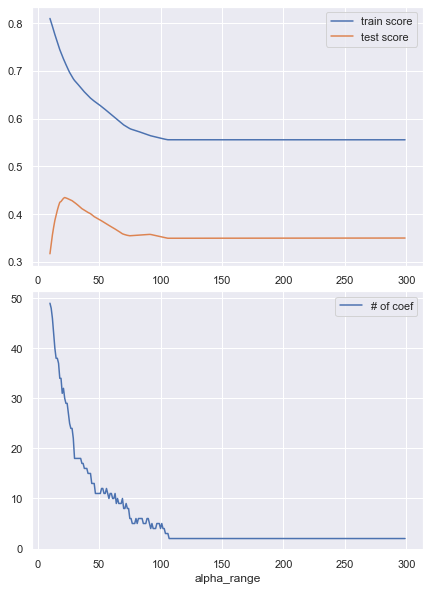

In [182]:
#We have 134 features, but few data points 13x, 13x, 3x in each cluster
#Our model will be prone to overfitting; therefore, we applied regularization using lasso
#We plot the penalty parameter (alpha) against train and test scores, to find the optimal penalty parameter
X = Label0[features]
Y = Label0["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

train_score = []
test_score = []
no_of_coeff = []
alpha_range = np.arange(10,300)
for a in alpha_range:
    lasso = Lasso(alpha=a, max_iter=1800)
    lasso.fit(X_train,y_train)
    train_score.append(lasso.score(X_train,y_train))
    test_score.append(lasso.score(X_test,y_test))
    no_of_coeff.append(np.sum(lasso.coef_!=0))

sns.set()
fig, ax = plt.subplots(2, 1, sharex=False, figsize=(7,10))
fig.subplots_adjust(hspace=0.1)
ax[0].plot(alpha_range, train_score, label="train score")  
ax[0].plot(alpha_range, test_score, label="test score")
ax[0].legend(loc='best')
ax[1].plot(alpha_range, no_of_coeff, label="# of coef") 
ax[1].legend(loc='best')
plt.xlabel('alpha_range')

In [183]:
#In culster 0 (low price, low availability), we use alpha=50, and print the train/test scores
lasso = Lasso(alpha=50).fit(X_train,y_train)
tr_score = lasso.score(X_train,y_train)
te_score = lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", tr_score)
print("test score: ", te_score)
print("number of features used: ", coeff_used)

training score: 0.6291403156886646
test score:  0.3890859342513857
number of features used:  11


In [342]:
#We tried linear regression without regularization. As expected, the model is overfitted
#lr = LinearRegression()
#lr.fit(X_train,y_train)
#lr_train_score = lr.score(X_train,y_train)
#lr_test_score = lr.score(X_test,y_test)
#print("LR training score:", lr_train_score)
#print("LR test score: ", lr_test_score)

LR training score: 1.0
LR test score:  -17.44149258326776


In [184]:
#List the features that are not eliminated by lasso
coef = np.nonzero(lasso.coef_)[0]
print(coef)

[  0   1  14  33  39  40  56  64 114 117 131]


In [185]:
#Get the new subset of features 
lasso_features = [X.columns[i] for i in coef]
X[lasso_features].head()

,Days Available,Daily Rate,Beachfront,Elevator,Family/kid friendly,Fire extinguisher,Host greets you,Laptop friendly workspace,No of Features,accommodates_4,beds_3
1,20.0,34.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,1,0
3,55.0,40.0,0.0,0.0,1.0,1.0,1.0,1.0,27.0,1,0
5,119.0,80.0,0.0,0.0,1.0,0.0,1.0,1.0,32.0,1,1
6,31.0,52.0,0.0,0.0,1.0,1.0,1.0,1.0,31.0,0,0
8,116.0,69.0,0.0,0.0,1.0,1.0,0.0,1.0,36.0,0,0


In [186]:
#Use the new subset of features to run regression
#Repeat the steps for cluster 1 & 2, we get different subsets of features and 3 different OLS model
X = sm.add_constant(X[lasso_features])
OLS_model = sm.OLS(Y,X)
result = OLS_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     19.13
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           5.80e-22
Time:                        01:25:37   Log-Likelihood:                -1121.6
No. Observations:                 137   AIC:                             2267.
Df Residuals:                     125   BIC:                             2302.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/Users/kystanleylin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
